
---

## **Install required libraries**

In [5]:
# install pandas profiling library
!pip install -U pandas-profiling --quiet
!pip install -U ydata-profiling

In [6]:
#!pip install -U ydata-profiling

In [7]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the dataset**

In [8]:
#loading the dataset

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

df = pd.read_csv('/content/gdrive/MyDrive/Ljmu/ai4i2020.csv')
df.head()

Mounted at /content/gdrive/


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [9]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [10]:
df.head(3)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0

# **Data Preparation**

## **Exploratory data analysis**

In [11]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [12]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [13]:
df.head(2)

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   

   Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0          0                0    0    0    0    0    0  
1          3                0    0    0    0    0    0

In [14]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [15]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

count        mean         std     min     25%     50%  \
Air temperature      10000.0   300.00493    2.000259   295.3   298.3   300.1   
Process temperature  10000.0   310.00556    1.483734   305.7   308.8   310.1   
Rotational speed     10000.0  1538.77610  179.284096  1168.0  1423.0  1503.0   
Torque               10000.0    39.98691    9.968934     3.8    33.2    40.1   
Tool wear            10000.0   107.95100   63.654147     0.0    53.0   108.0   
Machine failure      10000.0     0.03390    0.180981     0.0     0.0     0.0   
TWF                  10000.0     0.00460    0.067671     0.0     0.0     0.0   
HDF                  10000.0     0.01150    0.106625     0.0     0.0     0.0   
PWF                  10000.0     0.00950    0.097009     0.0     0.0     0.0   
OSF                  10000.0     0.00980    0.098514     0.0     0.0     0.0   
RNF                  10000.0     0.00190    0.043550     0.0     0.0     0.0   

                        75%     max  
Air temperature       301.5   304.5  
Process temperature   311.1   313.8  
Rotational speed     1612.0  2886.0  
Torque                 46.8    76.6  
Tool wear             162.0   253.0  
Machine failure         0.0     1.0  
TWF                     0.0     1.0  
HDF                     0.0     1.0  
PWF                     0.0     1.0  
OSF                     0.0     1.0  
RNF                     0.0     1.0

In [16]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

count unique top  freq
Type  10000      3   L  6000

:Ploting the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


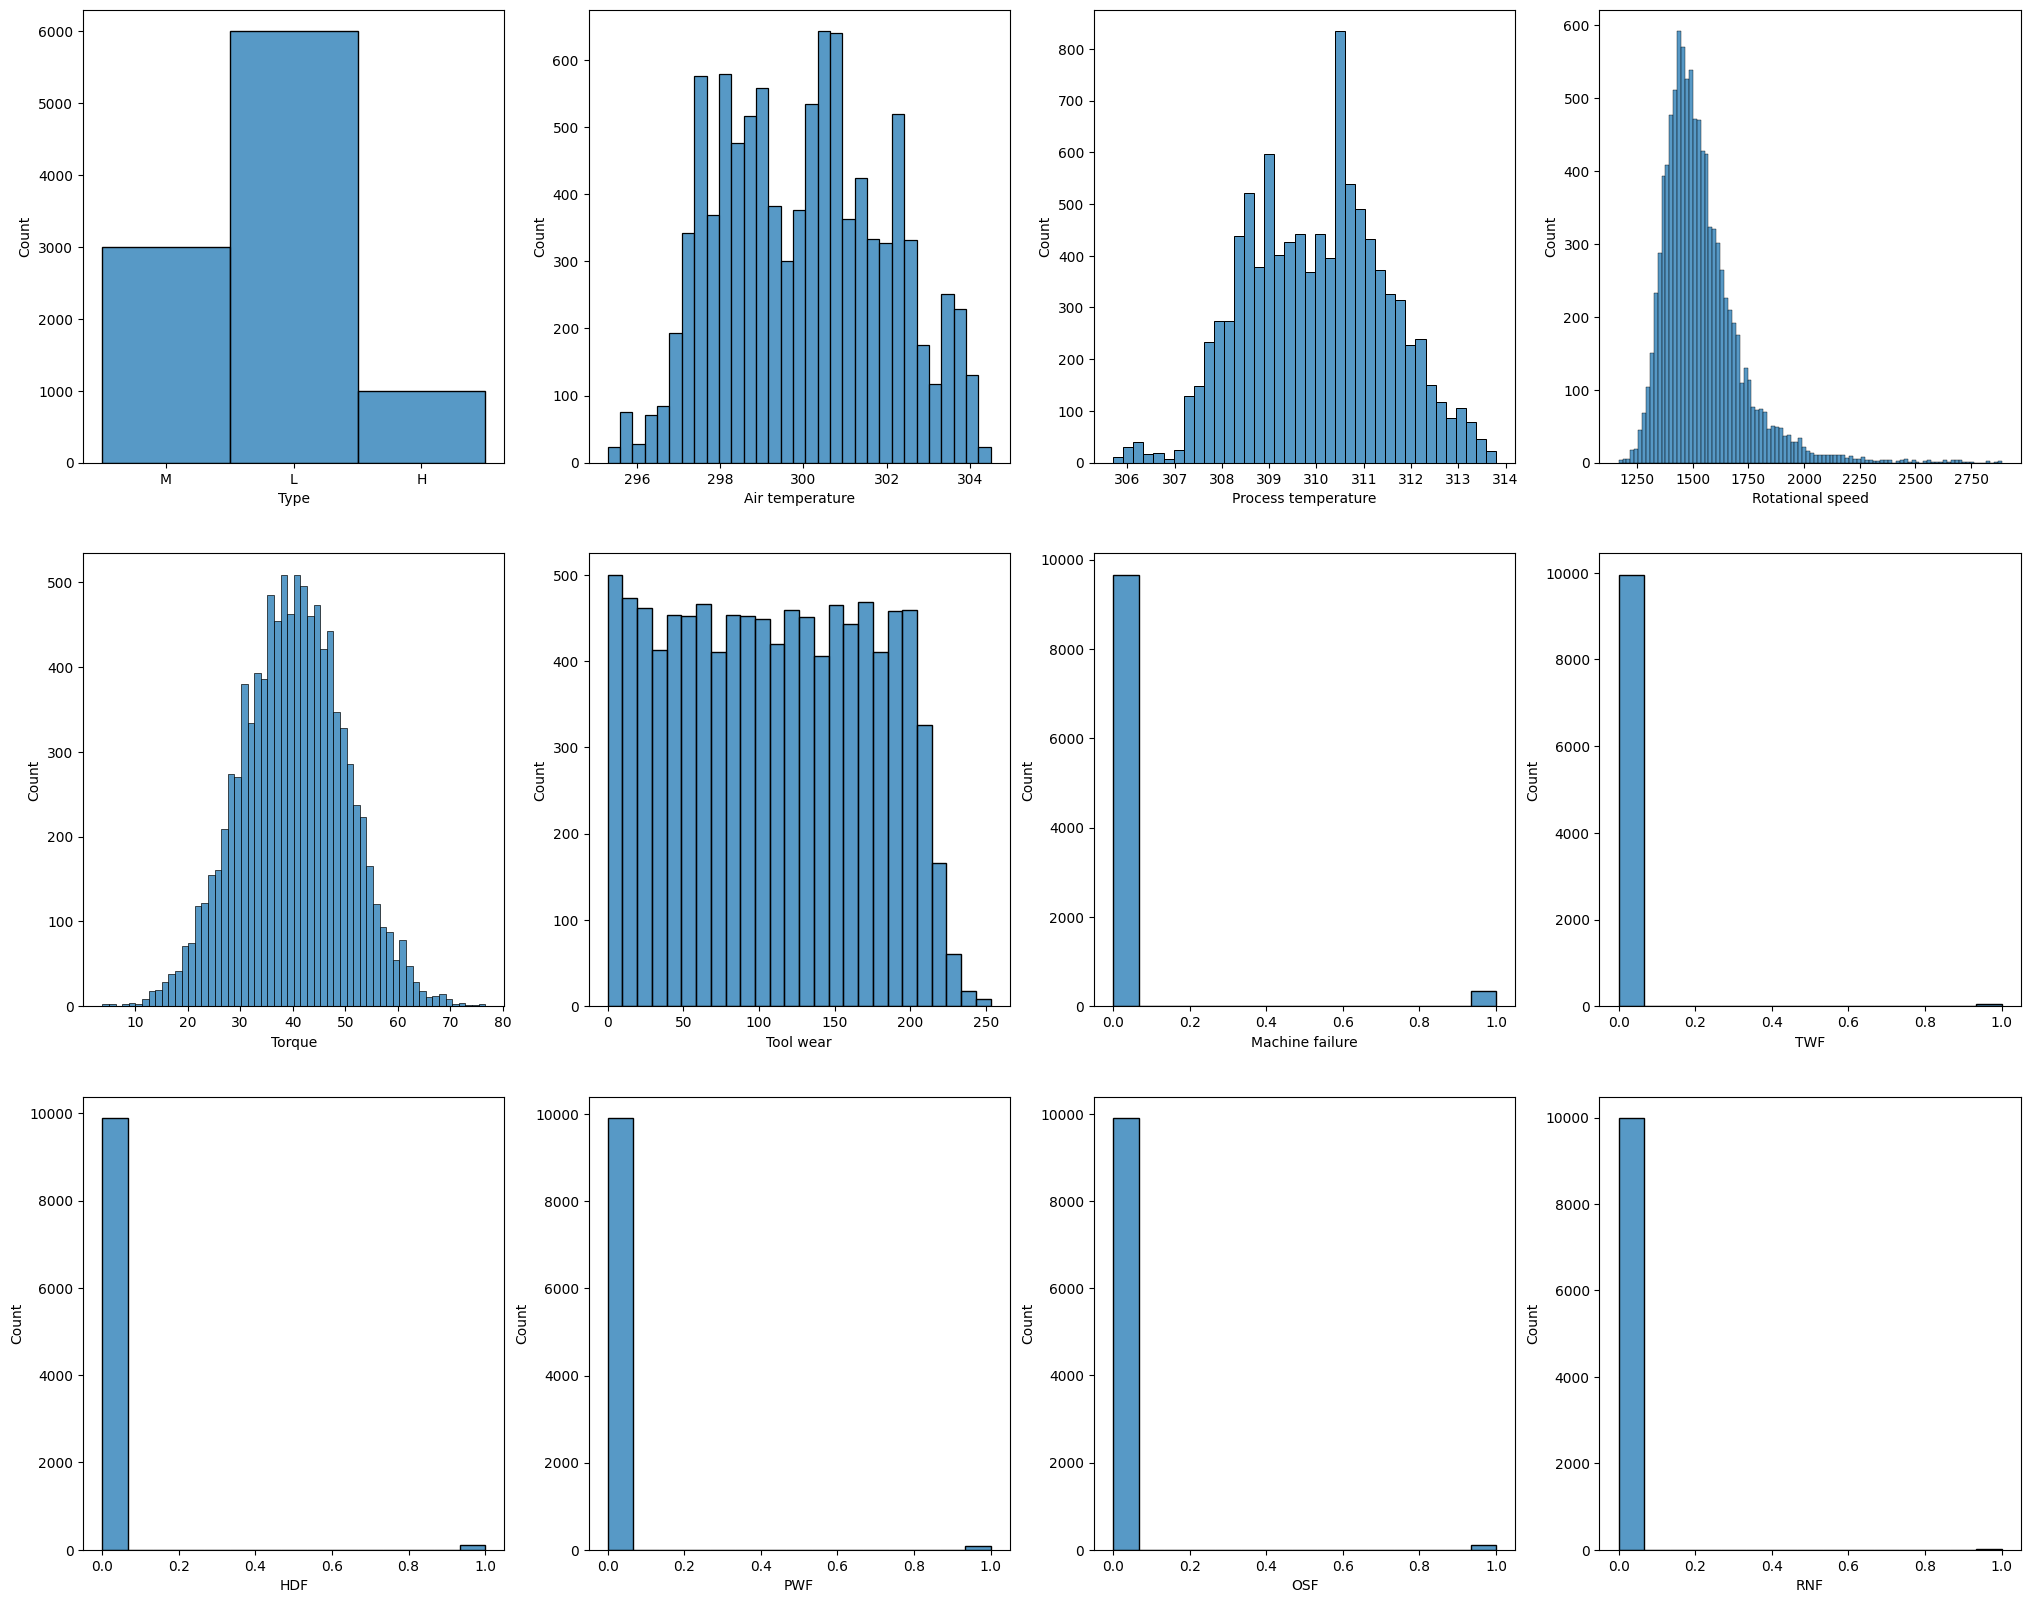

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

In [18]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

Text(0.5, 1.0, 'Number of failure types per record')

* From number of figure, We found that 24 records contain more than one type of failure.
* Although their count is very small compared to the entire data set.
* Hence we will combine the failure types into one feature.
Individual failure types are then dropped.
* No failure = 0, TWF = HDF = PWF = OSF = RNF = 1


In [19]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [20]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

We can derive a new attribute using this formula:

$Power = Torque \times Rotational \ speed$

In [21]:
#For evaluation without power, jst removed this code

df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)

In [22]:
# Plot the histogram of Power attribute
sns.histplot(df['Power'])

<Axes: xlabel='Power', ylabel='Count'>

## **Data type conversion**

In [23]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

In [24]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [25]:
# view columns data types
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

## **Handling outliers**

In [26]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

Calculate and handle the outliers for each attribute using IQR and Winsorization

In [27]:
for col in df.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] <= (Q1 - 1.5 * IQR)) | (df[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df.drop(outliers.index, inplace=True)

Density-Based Anomaly Detection (LOF)

In [28]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)

In [29]:
df.shape # after removing the outliers

(9400, 8)

## **Transformation**

Normalize the attributes using z-score

$z = \frac{x - \mu} {\sigma}$, $\mu:$ Mean, $σ:$ Standard deviation

In [30]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

## **More visualizations**

Box and Whisker Plots for each attribute compared with Machine failure (target)

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(df.columns):
    sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i//4][i%4])

Box and Whisker Plots for each attribute

<Axes: title={'center': 'Box and Whisker Plots'}, ylabel='Value'>

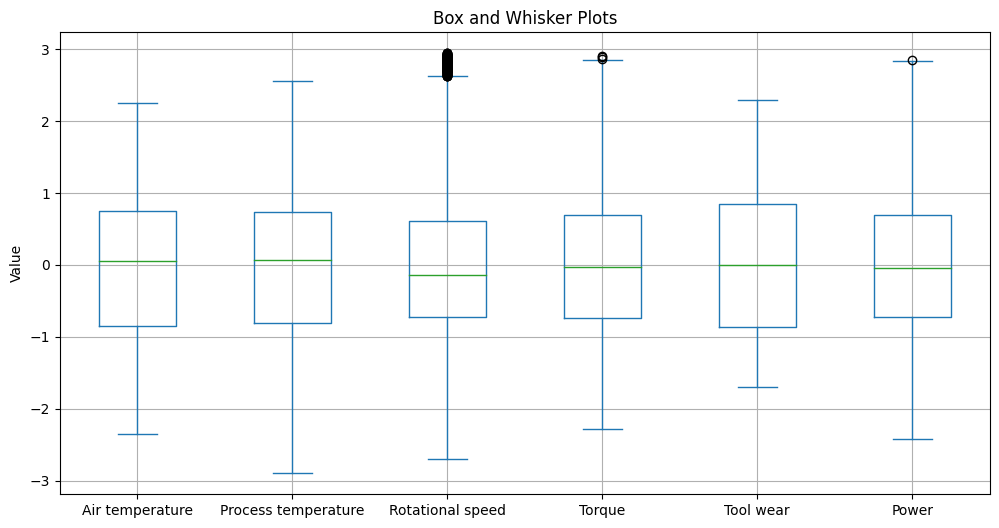

In [32]:
plot_columns = [col for col in df.columns if col not in excluded_columns]
df[plot_columns].plot(kind='box', figsize=(12, 6), title='Box and Whisker Plots', ylabel='Value', grid=True)

Finding the correlation between the attributes with threshold = 0.3


<Axes: >

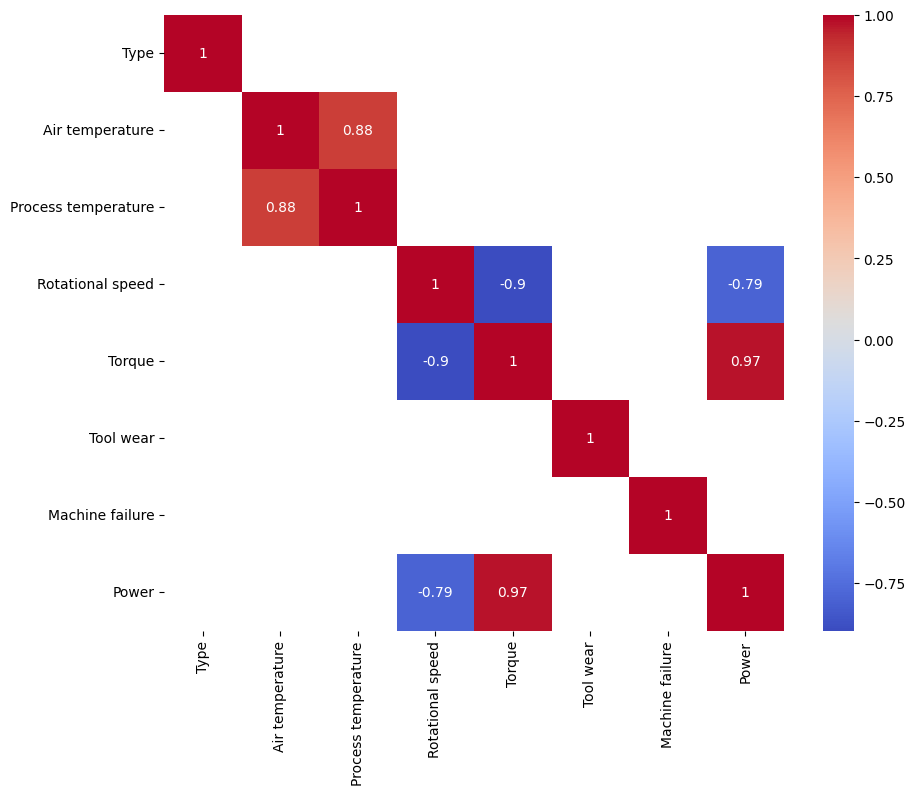

In [33]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

A scatter plot matrix to display the relationships between attributes in the dataset

In [34]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

Generate a profile report that includes (outliers, missing values, distributions, etc.) using [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html)

In [35]:
df_profile = pdpf.ProfileReport(df, dark_mode=True)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Modeling**

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## **Data splitting and sampling**


---



In [37]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

Split the dataset (80% train : 20% test)

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

Because the data is imbalanced, we oversample the training set

In [39]:
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE(random_state = 42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

Training set after oversampling

(array([7322.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7322.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

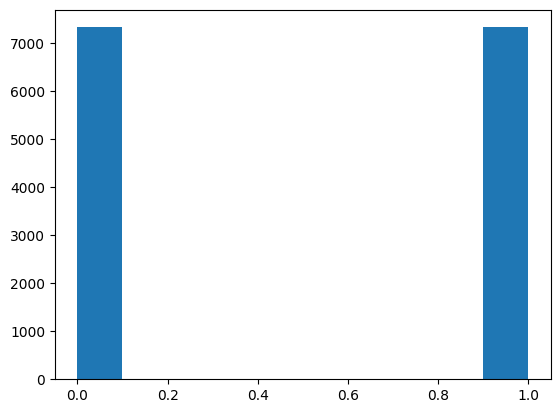

In [40]:
plt.hist(y_train)

## **Decision Tree Model**




Build the model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time
# Define hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Set up the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Measure training time
start = time.time()
grid_search.fit(X_train, y_train)
end_train = time.time()

best_model = grid_search.best_estimator_
end_predict = time.time()

# Display the best parameters found
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [42]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(criterion= 'entropy',
                               max_depth= None,
                               min_samples_leaf= 1,
                               min_samples_split= 2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [43]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1830
         1.0       0.46      0.70      0.56        50

    accuracy                           0.97      1880
   macro avg       0.73      0.84      0.77      1880
weighted avg       0.98      0.97      0.97      1880



In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion matrix of Decision Tree model

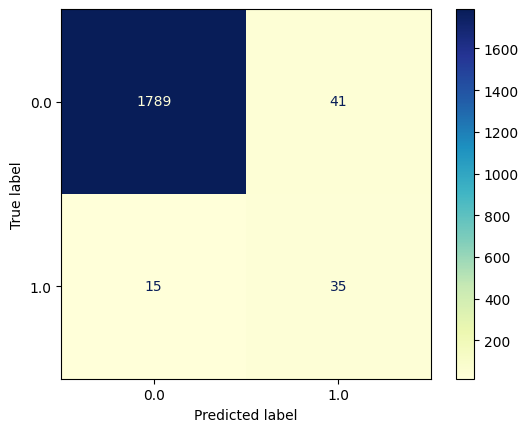

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

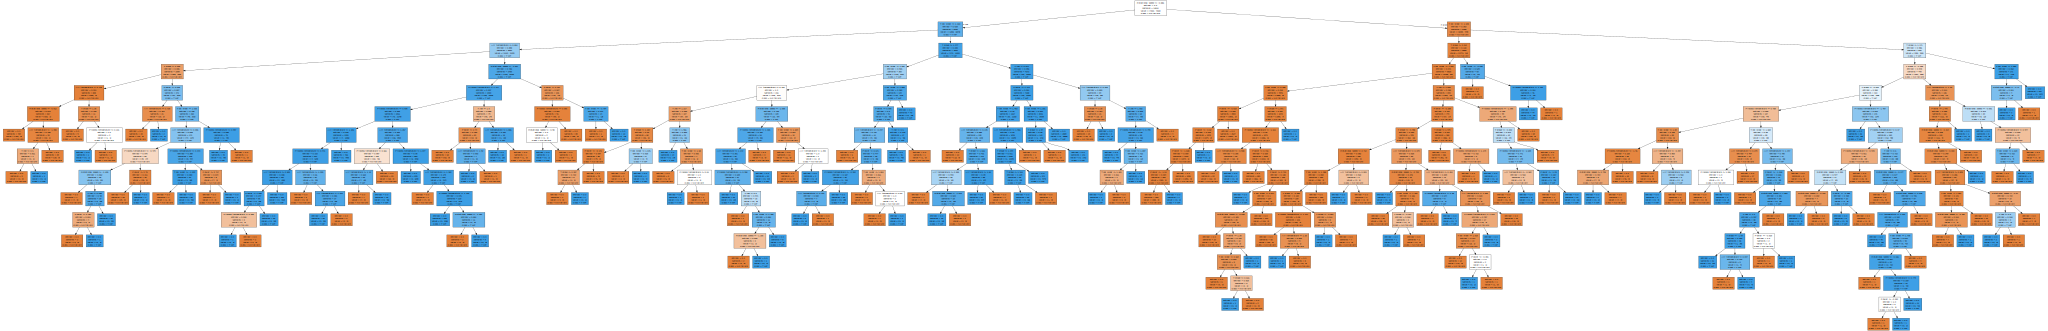

In [46]:
import graphviz
from sklearn import tree

data = tree.export_graphviz(model,
                            feature_names=X.columns,
                            class_names=['No failure','TWF','HDF','PWF','OSF','RNF'],
                            filled=True)

# draw graph
graph = graphviz.Source(data, format="png")
graph.render('nodes', view=False)
graph

In [47]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_3 <= -0.88
|   |--- feature_5 <= 1.15
|   |   |--- feature_1 <= 0.80
|   |   |   |--- feature_4 <= 2.24
|   |   |   |   |--- feature_1 <= 0.78
|   |   |   |   |   |--- feature_3 <= -0.91
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_3 >  -0.91
|   |   |   |   |   |   |--- feature_1 <= -1.40
|   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_1 >  -1.40
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  0.78
|   |   |   |   |   |--- feature_4 <= 1.35
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_4 >  1.35
|   |   |   |   |   |   |--- feature_2 <= 0.10
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_2 >  0.10
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  2

## **k-NN (K-nearest neighbors) Model**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


Build the model

In [49]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [50]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1830
         1.0       0.48      0.50      0.49        50

    accuracy                           0.97      1880
   macro avg       0.73      0.74      0.74      1880
weighted avg       0.97      0.97      0.97      1880



In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_predictions are already defined
# Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability estimates for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - k-NN Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion matrix of k-NN model

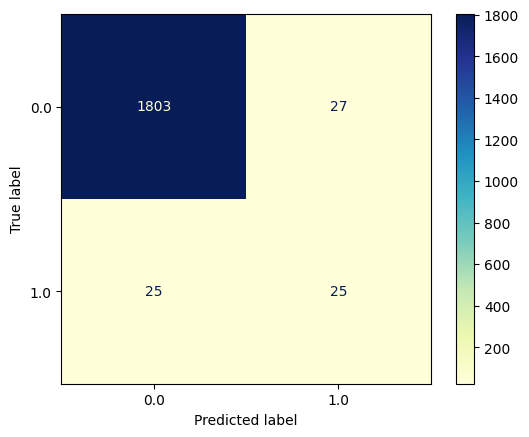

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **Random Forest Model**

Build the model

In [53]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure


In [54]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1830
         1.0       0.67      0.60      0.63        50

    accuracy                           0.98      1880
   macro avg       0.83      0.80      0.81      1880
weighted avg       0.98      0.98      0.98      1880



In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_predictions are already defined
# Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Extract probabilities for class 1

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion matrix of Random Forest model

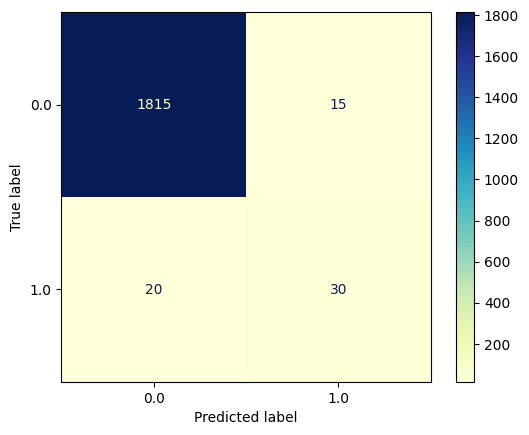

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **XGBoost Model**

Build the model

In [57]:
from xgboost import XGBClassifier
import time

# Train the model using XGBoost
start = time.time()
model = XGBClassifier(
        n_estimators=200,            # Number of gradient boosted trees
        max_depth=10,                # Maximum tree depth for base learners
        learning_rate=0.03,          # Boosting learning rate (xgb's "eta")
        subsample=0.7,
).fit(X_train, y_train)
end_train = time.time()

# Make predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Evaluate the model
log_scores("XGBoost", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [58]:
print("XGBoost\n" + classification_report(y_test, y_predictions))

XGBoost
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1830
         1.0       0.62      0.66      0.64        50

    accuracy                           0.98      1880
   macro avg       0.81      0.82      0.82      1880
weighted avg       0.98      0.98      0.98      1880



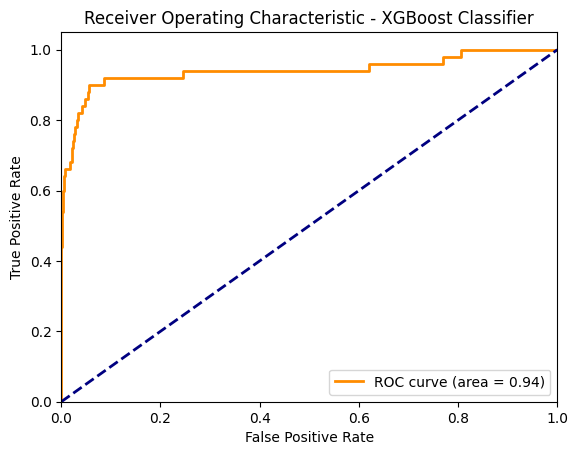

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_predictions are defined
# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (class 1)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion matrix of XGBoost model

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **MLP (Multi-layer Perceptron) Model**

Build the model

In [61]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(
    hidden_layer_sizes=(100),
    activation='relu',
    solver='adam',
    random_state=1,
    max_iter=600,
    learning_rate="invscaling"
    ).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [62]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1830
         1.0       0.65      0.72      0.69        50

    accuracy                           0.98      1880
   macro avg       0.82      0.85      0.84      1880
weighted avg       0.98      0.98      0.98      1880



In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize  # in case you have multi-class classification

# Assuming y_test and y_predictions are defined
# For binary classification:
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion matrix of Multi-layer Perceptron model

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

# **Evaluation**

In [65]:
model_performance    # With Introducing "POWER" feature

Accuracy  Precision    Recall  F1-Score  \
Decision Tree           0.970213   0.977559  0.970213  0.973179   
k-NN                    0.972340   0.972878  0.972340  0.972604   
Random Forest           0.981383   0.980525  0.981383  0.980906   
XGBoost                 0.980319   0.980906  0.980319  0.980598   
Multi-layer Perceptron  0.982447   0.983345  0.982447  0.982853   

                        Training time  Prediction time  
Decision Tree                0.093444         0.002382  
k-NN                         0.153485         0.941571  
Random Forest                2.151167         0.044375  
XGBoost                      0.683096         0.011746  
Multi-layer Perceptron      34.191814         0.003358